In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('vif_data.csv')

In [3]:
df.head()

,Unnamed: 0,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_table_Zipcode_2,Zipcode_table_Zipcode_3,Zipcode_table_Zipcode_4,Zipcode_table_Zipcode_5,Zipcode_table_Zipcode_6,Zipcode_table_Zipcode_7,Zipcode_table_Zipcode_8,Zipcode_table_Zipcode_9,Zipcode_table_Zipcode_10,sale_price
0,0,3,1.00,5650.0,1.0,0,2,7,1180.0,0,...,1,0,0,0,0,0,0,0,0,221900.0
1,1,3,2.25,7242.0,2.0,0,2,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,538000.0
2,2,2,1.00,10000.0,1.0,0,2,6,770.0,0,...,0,0,1,0,0,0,0,0,0,180000.0
3,3,4,3.00,5000.0,1.0,0,3,7,1050.0,910,...,0,0,0,0,1,0,0,0,0,604000.0
4,4,3,2.00,8080.0,1.0,0,2,8,1680.0,0,...,0,0,0,0,0,0,1,0,0,510000.0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.columns

Index(['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No_of_Times_Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'house_is', 'Zipcode_table_Zipcode_2', 'Zipcode_table_Zipcode_3',
       'Zipcode_table_Zipcode_4', 'Zipcode_table_Zipcode_5',
       'Zipcode_table_Zipcode_6', 'Zipcode_table_Zipcode_7',
       'Zipcode_table_Zipcode_8', 'Zipcode_table_Zipcode_9',
       'Zipcode_table_Zipcode_10', 'sale_price'],
      dtype='object')

In [6]:
x = df.drop(['sale_price'],axis=1)
y = df['sale_price']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [9]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((17287, 25), (4322, 25), (17287,), (4322,))

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scale = StandardScaler()

In [12]:
x_train = scale.fit_transform(x_train)

In [13]:
x_train

array([[ 0.67849763,  0.17628744, -0.13672473, ..., -0.33539701,
        -0.20695513,  5.7824091 ],
       [-0.39757471,  0.50121344, -0.31713296, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       [ 1.75456997,  0.50121344, -0.25619645, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       ...,
       [-0.39757471, -1.44834258, -0.16884539, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       [ 0.67849763, -0.47356457, -0.14920685, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       [ 0.67849763,  0.17628744, -0.19200269, ..., -0.33539701,
         4.83196516, -0.1729383 ]])

In [14]:
x_test = scale.fit_transform(x_test)

In [15]:
x_test

array([[ 0.66938228,  0.49679891, -0.22877615, ..., -0.34428189,
        -0.21737023, -0.18764216],
       [ 0.66938228, -0.15022983, -0.1519448 , ..., -0.34428189,
        -0.21737023, -0.18764216],
       [ 0.66938228,  0.49679891, -0.25282142, ..., -0.34428189,
         4.60044591, -0.18764216],
       ...,
       [ 0.66938228,  0.49679891, -0.11156836, ..., -0.34428189,
        -0.21737023,  5.32929269],
       [-0.40331709,  0.49679891,  0.30777908, ..., -0.34428189,
        -0.21737023, -0.18764216],
       [-0.40331709,  0.17328454, -0.33625747, ..., -0.34428189,
        -0.21737023, -0.18764216]])

# linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_reg = LinearRegression(normalize=True)

In [18]:
linear_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [19]:
linear_reg.coef_

array([  3887.30227489,   8207.09966093,  11919.76309002,   1709.96521233,
        15361.24898004,  10077.05854911,  48290.65590229,  48801.95067992,
        18723.69616812,  29279.36539389,   4235.64364784, -21435.12126439,
        18058.46842914,   -677.43931818,   8610.71636534,  -7773.21679784,
        14559.00181045,  35322.50208443,  47263.3281798 ,  53309.16631476,
        88618.19473343,  89038.26146518,  88189.03327456,  62118.68545526,
        57044.04970603])

In [20]:
prediction = linear_reg.predict(x_test)

In [21]:
linear_regression = linear_reg.score(x_test,y_test)

In [22]:
linear_regression

0.8191461537148859

## metrics

In [23]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
r2_score = r2_score(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = mse ** 0.5

In [25]:
print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2_score : 0.8191461537148859
mae : 64179.84842041007
mse : 7141849419.481981
rmse : 84509.46349067648


In [26]:
prediction.shape, y_test.shape

((4322,), (4322,))

In [27]:
table = pd.DataFrame({'y_test':y_test,'prediction':prediction})

<Figure size 2000x2500 with 0 Axes>

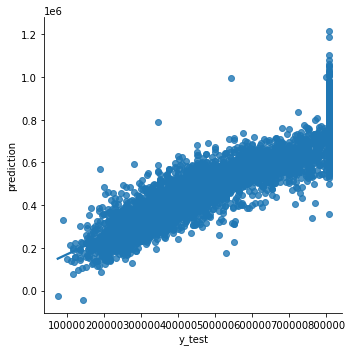

In [28]:
plt.figure(figsize=(20,25),dpi=100)
sns.lmplot('y_test','prediction',data=table)

## residuals


In [29]:
residual = prediction - y_test

residual_table = pd.DataFrame({'residuals' : residual,'predictions' : prediction})
residual_table = residual_table.sort_values(by='predictions')

In [30]:
residual_table.head()

,residuals,predictions
19450,-185840.350282,-43840.350282
1147,-98756.321021,-23756.321021
17600,-36034.429239,78965.570761
6660,-106550.079014,86449.920986
16950,-33723.107323,95276.892677


In [31]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

(800000.0, -800000.0)

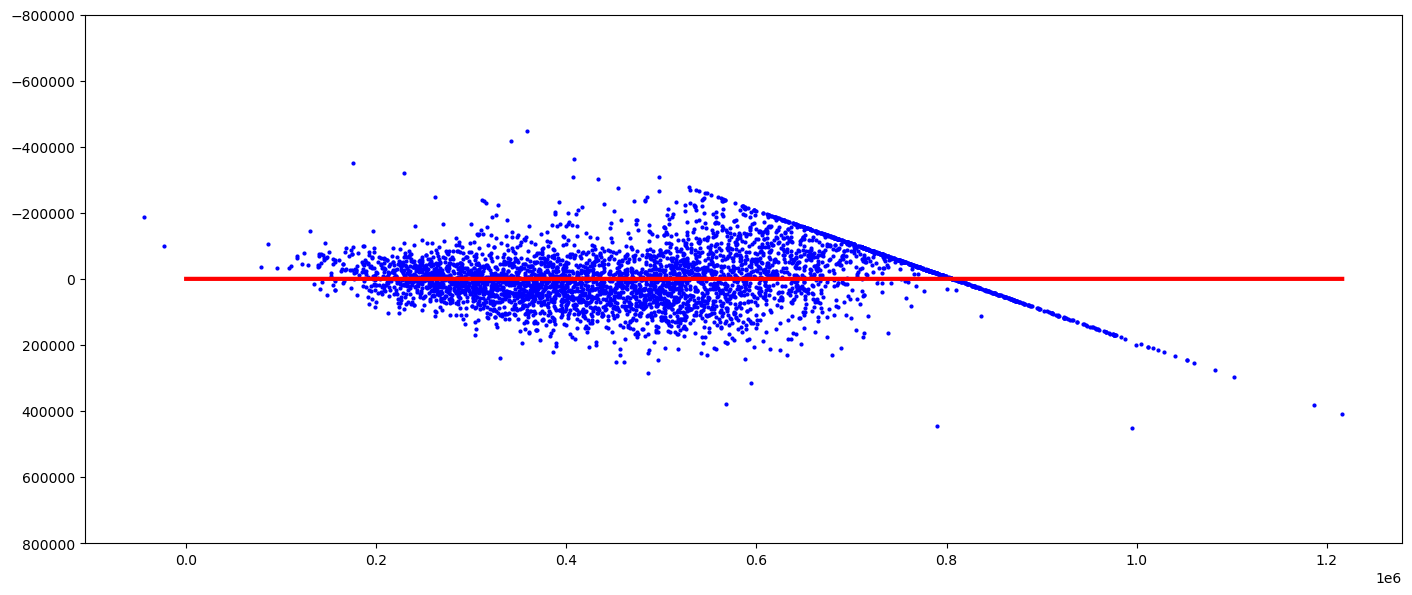

In [32]:
plt.figure(figsize=(17,7),dpi=100)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='blue',s=4)
plt.plot(z,k,color='red',linewidth=3)
plt.ylim(800000,-800000)

## distribution of errors

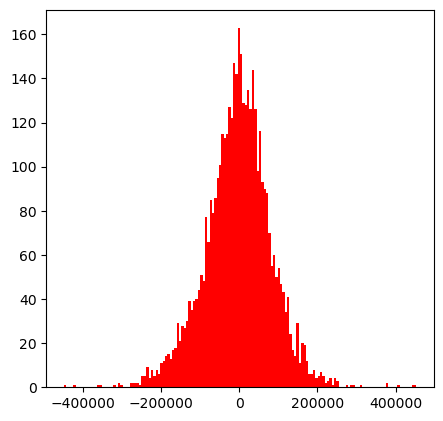

In [33]:
plt.figure(figsize=(5,5),dpi=100)
plt.hist(residual_table['residuals'],color='red',bins=150)
plt.show()

In [34]:
coeff_table = pd.DataFrame({'columns':['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No_of_Times_Visited', 'Condition_of_the_House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'no_of_years(house sold)',
       'house_is', 'Zipcode_table_Zipcode_2', 'Zipcode_table_Zipcode_3',
       'Zipcode_table_Zipcode_4', 'Zipcode_table_Zipcode_5',
       'Zipcode_table_Zipcode_6', 'Zipcode_table_Zipcode_7',
       'Zipcode_table_Zipcode_8', 'Zipcode_table_Zipcode_9',
       'Zipcode_table_Zipcode_10'], 'coefficients':linear_reg.coef_})
coeff_table = coeff_table.sort_values(by='coefficients')

In [35]:
coeff_table.head()

,columns,coefficients
11,Longitude,-21435.121264
15,house_is,-7773.216798
13,Lot Area after Renovation (in Sqft),-677.439318
3,No of Floors,1709.965212
0,No of Bedrooms,3887.302275


<BarContainer object of 25 artists>

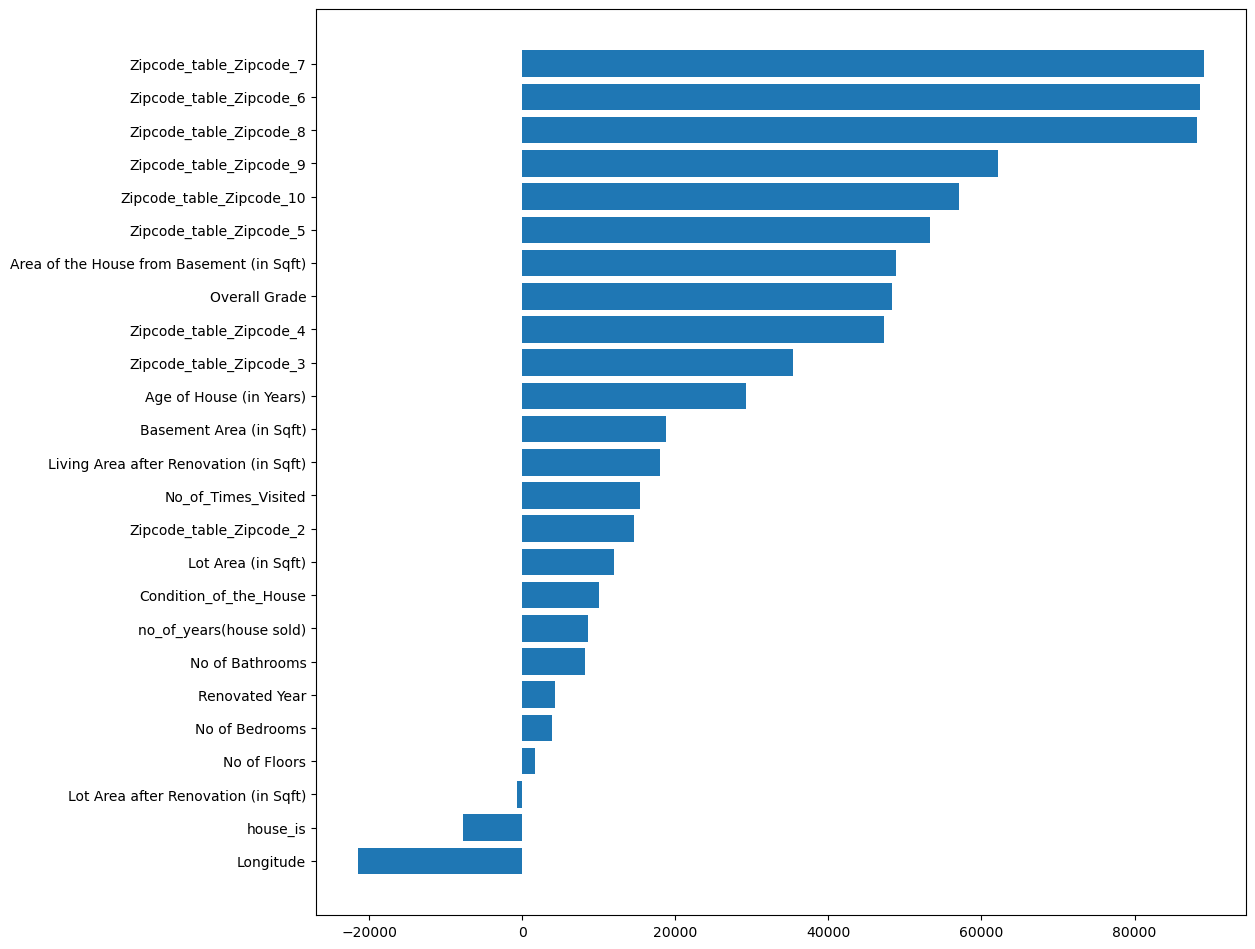

In [36]:
plt.figure(figsize=(12,12),dpi=100)
plt.barh(coeff_table['columns'],coeff_table['coefficients'])